In [71]:
import urllib2
import json
import re
import io
import matplotlib.pyplot as plt
import networkx as nx
import numpy
from collections import Counter
from pathlib2 import Path
import math
import copy
import community
import nltk, re, pprint
import os
import sklearn

In [73]:
Graph = nx.Graph()
revenueList = []
for filename in os.listdir('ActorsMoreThanX'):
    #print filename[:-4]
    test = io.open("ActorsMoreThanX/" + filename, 'r', encoding='utf-8')
    doneList = test.readlines()
    doneList = [x.strip() for x in doneList]
    test.close()
    rev = 0
    for line in doneList:
        filmen = io.open("MovieDBID/" + line + ".txt", 'r', encoding='utf-8')
        filmJson = json.load(filmen)
        rev = rev + filmJson["revenue"]
    rev = rev / len(doneList)
    Graph.add_node(filename[:-4], revenue = rev)
    revenueList.append([filename[:-4], rev])
    #break

In [47]:
len(Graph.nodes())

15085

In [74]:
for filename in os.listdir('Credits'):
    test = io.open("Credits/" + filename, 'r', encoding='utf-8')
    sidensJson = json.load(test)
    test.close()
    for i in sidensJson["cast"]:
        try:
            Graph.node[str(i["id"])]
            for j in sidensJson["cast"]:
                try:
                    Graph.node[str(j["id"])]
                    if (i["id"] != j["id"]):
                        #print i["id"], j["id"]
                        Graph.add_edge(str(i["id"]),str(j["id"]))
                except:
                    pass
        except:
            pass
    #break
for i in Graph.nodes():
    if Graph.degree(i) == 0:
        Graph.remove_node(i)
        print i

In [63]:
len(Graph.edges())

670939

In [64]:
len(Graph.nodes())

15085

In [62]:
giant = max(nx.connected_component_subgraphs(Graph), key=len)

In [65]:
type(giant)

networkx.classes.graph.Graph

In [67]:
len(giant.nodes())

15082

In [68]:
len(giant.edges())

670936

C:\Users\masta\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\masta\Anaconda2\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\masta\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


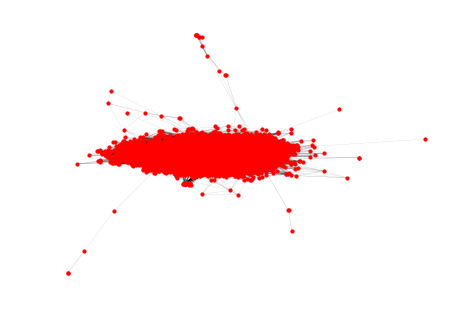

In [69]:
nx.draw(giant, node_size = 10, width = 0.05)

plt.show()

In [51]:
d = list(Graph.degree().values())
averageDegree = numpy.average(d)
print averageDegree
medianDegree = numpy.median(d)
print medianDegree

88.9544580709
62.0


In [52]:
limitedInList = Counter(d).most_common(10)
limitedInList

[(35, 218),
 (37, 212),
 (34, 207),
 (40, 202),
 (47, 199),
 (43, 198),
 (45, 198),
 (41, 197),
 (36, 194),
 (44, 190)]

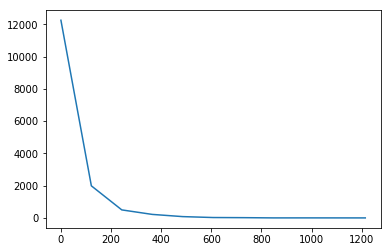

In [53]:
degreeValues = Graph.degree().values()
degreeBins,degreeBins_edges = numpy.histogram(degreeValues)
degreeBins = numpy.append(degreeBins,0)
plt.plot(degreeBins_edges,degreeBins)
plt.show()

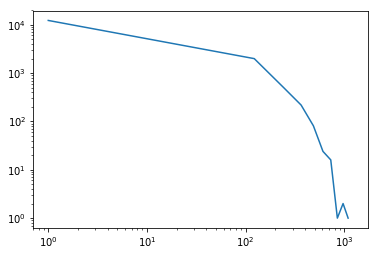

In [54]:
plt.plot(degreeBins_edges,degreeBins)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [55]:
partition = community.best_partition(Graph)

C:\Users\masta\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\masta\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


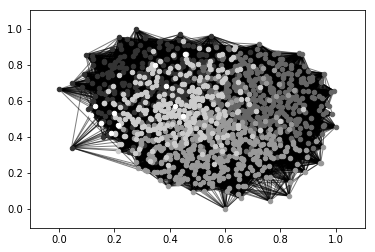

In [10]:

size = float(len(set(partition.values())))
pos = nx.spring_layout(Graph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(Graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))
nx.draw_networkx_edges(Graph,pos, alpha=0.5)
plt.show()

In [56]:
Mod = community.modularity(partition, Graph)
print Mod

0.368721707538


In [57]:
communitiesNumber = max(partition.values())
print "Number of communities : ", communitiesNumber

Number of communities :  12


In [58]:
testList = partition.values()
for i in set(partition.values()):
    print testList.count(i)

2415
3210
3617
2011
1397
248
1102
281
427
356
14
4
3


In [14]:
testList.count(3)

284

In [61]:
betweenCent = nx.betweenness_centrality(Graph)

KeyboardInterrupt: 

In [ ]:
from collections import Counter
peopleList = Counter(betweenCent).most_common(5)
peopleList

In [ ]:
testList = []
for i in set(partition.values()):
    testList.append([])
for node, part in partition.iteritems():
    testList[part].append(node)
    print node, part

In [ ]:
M = 0.0
for i in testList:
    Lc = 0.0
    L = len(Graph.edges())
    Kc = 0.0
    for j in i:
        Kc = Kc + Graph.degree(j)
        for l in Graph[j].keys():
            if l in i:
                Lc = Lc + 1        
    print "Lc =", Lc, ",", "L =", L, "Kc =", Kc
    tempM = ((Lc / L) - (Kc/(2*L))**2)
    M = M + tempM
    print "M =", tempM
print "Sum Modularity for all the branches :", M